In [29]:
data = graphlab.SFrame('auto-mpg.csv')
data

Finished parsing file /Users/adityajp/Desktop/ML course/Mileage project/auto-mpg.csv

Parsing completed. Parsed 100 lines in 0.01403 secs.

Finished parsing file /Users/adityajp/Desktop/ML course/Mileage project/auto-mpg.csv

Parsing completed. Parsed 392 lines in 0.014766 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float,int,int,float,int,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


mpg,cylinders,displacement,hp,weight,acceleration,model year,origin,name
18,8,307.0,130,3504,12.0,70,1,"""chevrolet chevellemalibu"" ..."
15,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
18,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
16,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
17,8,302.0,140,3449,10.5,70,1,"""ford torino"""
15,8,429.0,198,4341,10.0,70,1,"""ford galaxie 500"""
14,8,454.0,220,4354,9.0,70,1,"""chevrolet impala"""
14,8,440.0,215,4312,8.5,70,1,"""plymouth fury iii"""
14,8,455.0,225,4425,10.0,70,1,"""pontiac catalina"""
15,8,390.0,190,3850,8.5,70,1,"""amc ambassador dpl"""


In [2]:
import graphlab

In [128]:
def polynomial_sframe(feature, degree, quantity):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe[quantity+'power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = quantity +'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature**power

    return poly_sframe

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

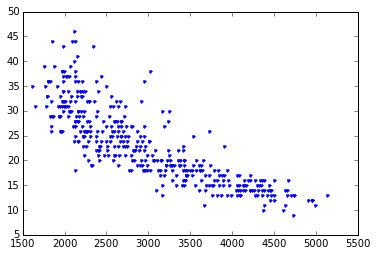

In [32]:
plt.plot(data['weight'],data['mpg'],'.')
#Relation between weight and mpg - Strong correlation

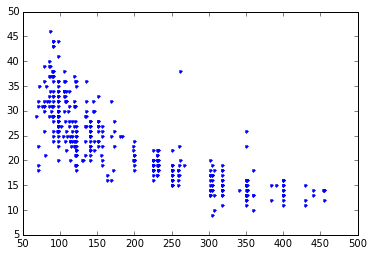

In [33]:
plt.plot(data['displacement'],data['mpg'],'.')
#Relation between displacement and mpg - Time series like correlation

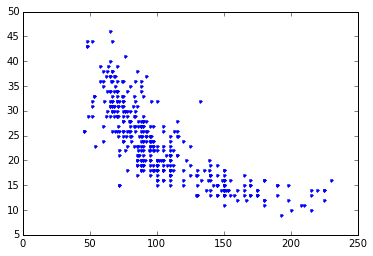

In [34]:
plt.plot(data['hp'],data['mpg'],'.')
#Relation between hp and mpg - Somewhat of a correlation

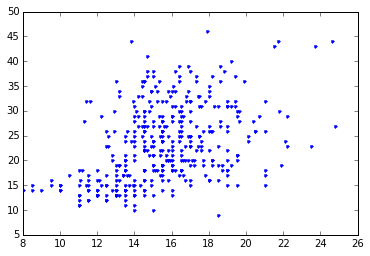

In [38]:
plt.plot(data['acceleration'],data['mpg'],'.')
#Relation between acceleration and mpg - weak correlation

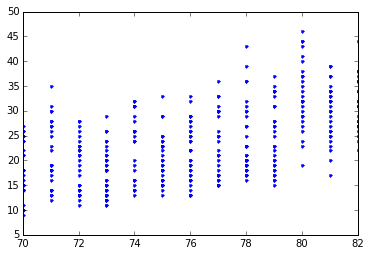

In [40]:
plt.plot(data['model year'],data['mpg'],'.')
#Relation between model year and mpg - Weak correlation

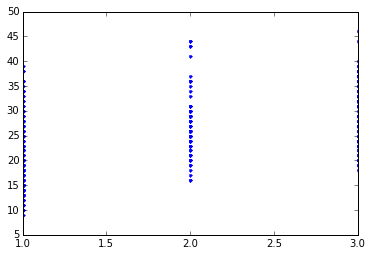

In [43]:
plt.plot(data['origin'],data['mpg'],'.')
#Relation between origin and mpg - No correlation. Discard this information. 

In [105]:
(training_and_validation, testing) = data.random_split(0.9,seed=0)
(training, validation) = data.random_split(0.5,seed=0)

In [180]:
#Data to use weight, displacement, hp, acceleration. 
poly_data = polynomial_sframe(data['hp'],15,"hp")
poly_data_weight = polynomial_sframe(data['weight'],15,"weight")
poly_data_disp = polynomial_sframe(data['displacement'],15,"displacement")
poly_data.add_columns(poly_data_weight)
poly_data.add_columns(poly_data_disp)
my_features = poly_data.column_names()
poly_data['mpg'] = data['mpg']
model = graphlab.linear_regression.create(poly_data, target = 'mpg', features = my_features, validation_set = None, verbose=False)


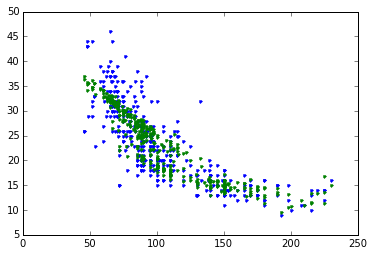

In [181]:
plt.plot(poly_data['hppower_1'],poly_data['mpg'],'.',
        poly_data['hppower_1'], model.predict(poly_data),'.')

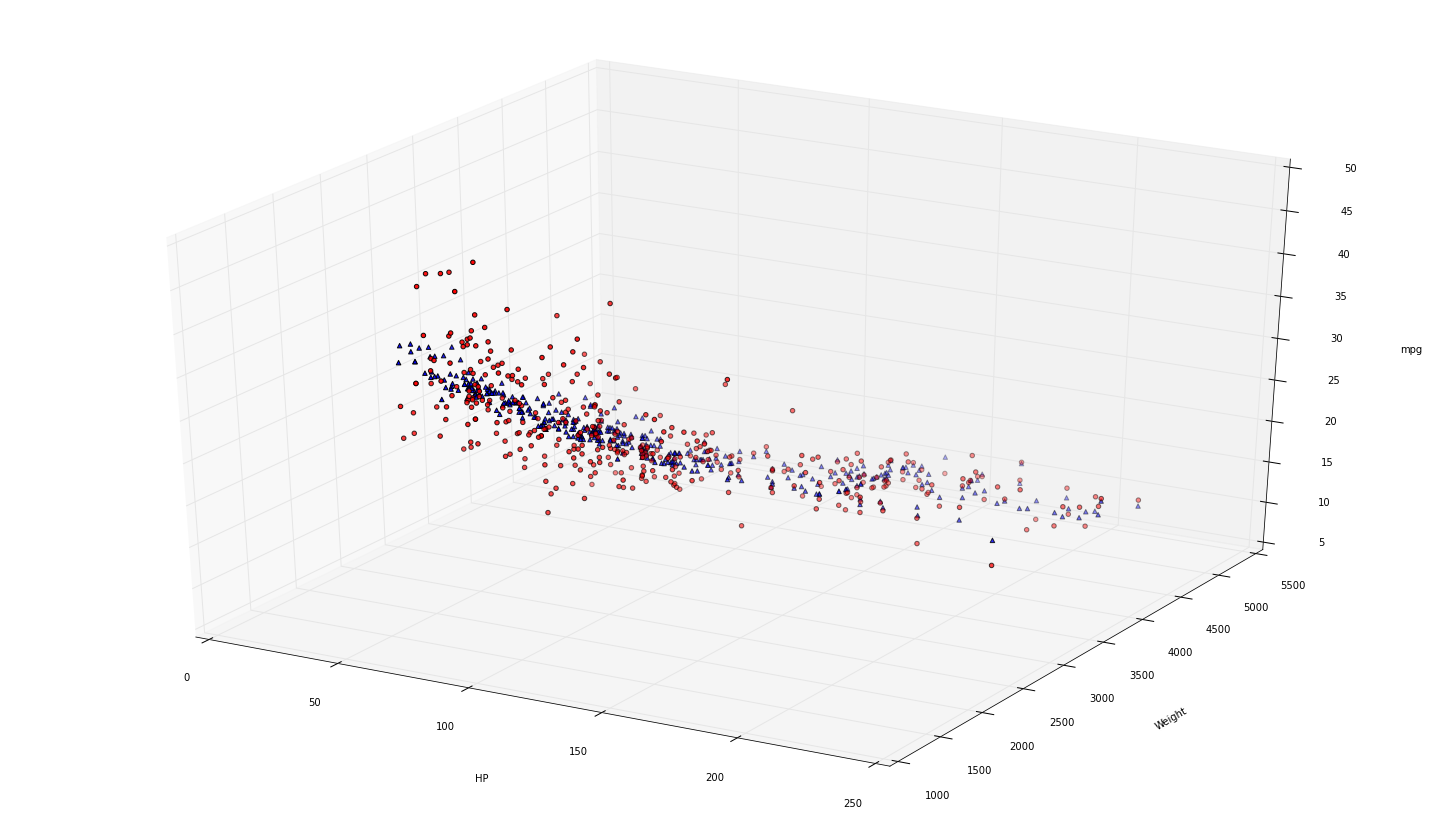

In [177]:
from matplotlib import pyplot
import pylab
from mpl_toolkits.mplot3d import Axes3D
import random
import numpy as np

fig = pylab.figure()
fig.set_size_inches(25.5, 14.5)

ax = fig.add_subplot(110, projection='3d')


hp = np.array(poly_data['hppower_1'])
weight = np.array(poly_data['weightpower_1'])
mpg = np.array(poly_data['mpg'])
x_vals = hp
y_vals = weight
z_vals = mpg

pred_x_vals = hp
pred_y_vals = weight
pred_z_vals = model.predict(poly_data)
#random.shuffle(sequence_containing_x_vals)
#random.shuffle(sequence_containing_y_vals)
#random.shuffle(sequence_containing_z_vals)

ax.scatter(x_vals, y_vals,z_vals,c='r', marker='o')
ax.scatter(pred_x_vals, pred_y_vals, pred_z_vals,c='b', marker='^')
ax.set_xlabel('HP')
ax.set_ylabel('Weight')
ax.set_zlabel('mpg')
pyplot.show()
fig.savefig('test2png.png', dpi=100)

In [1]:
rss_list = []

#going to consider polynomial upto the power of 15
for i in range(1,16):
    
    #Gathering necessary data from the training set
    poly_data = polynomial_sframe(training['hp'],i,"hp")
    poly_data.add_columns(polynomial_sframe(training['weight'],i,"weight"))
    poly_data.add_columns(polynomial_sframe(training['displacement'],i,"displacement"))
    poly_data.add_columns(polynomial_sframe(training['acceleration'],i,"acceleration"))
    #column_names
    my_features = poly_data.column_names()
    
    poly_data['mpg'] = training['mpg']

    #Creating a regression model 
    model = graphlab.linear_regression.create(poly_data, target = 'mpg', features = my_features, validation_set = None, verbose=False)
    
    #Getting necessary data from the validation set
    validation_data = polynomial_sframe(validation['hp'],i,"hp")
    validation_data.add_columns(polynomial_sframe(validation['weight'],i,"weight"))
    validation_data.add_columns(polynomial_sframe(validation['displacement'],i,"displacement"))
    validation_data.add_columns(polynomial_sframe(validation['acceleration'],i,"acceleration"))
    
    #Predicted mpg
    prediction = model.predict(validation_data)
    
    #Computing the RSS (Residual sum of squares)
    difference = validation['mpg'] - prediction
    difference = difference ** 2 #Squaring all elements in the SFrame
    
    difference = np.array(difference) 
    rss = np.sum(difference)
    
    rss_list.append((rss,i)) #Append degree of the polynomial and RSS (Used for sorting later)

sorted_rss = sorted(rss_list, key=lambda tup: tup[0])    
degree = sorted_rss[0][1]

for i in sorted_rss:
    print i
#RSS is least for polynomial of degree 7 and highest for polynomial of degree 1 and RSS of degree 7 was found to be 3192 (approx)



NameError: name 'polynomial_sframe' is not defined

In [288]:
#Gathering testing data into an SFrame
def prediction(testing, model):
    testing_data = polynomial_sframe(testing['hp'],degree,"hp")
    testing_data.add_columns(polynomial_sframe(testing['weight'],degree,"weight"))
    testing_data.add_columns(polynomial_sframe(testing['displacement'],degree,"displacement"))
    testing_data.add_columns(polynomial_sframe(testing['acceleration'],degree,"acceleration"))
    #Prediction step
    testing_prediction = model.predict(testing_data)
    
    return (testing_prediction)


#Computing the RSS (Residual sum of squares)
predicted['mpg'] = testing['mpg']
predicted['predicted_results'] = prediction(testing,model)

difference = testing['mpg'] - predicted['predicted_results']
predicted['difference'] = difference
difference = difference ** 2 #Squaring all elements in the SFrame
    
difference = np.array(difference) 
rss = np.sum(difference)

print rss



5631.4898989


In [285]:
#predicted['mpg','predicted','difference'].print_rows(100,100)
print predicted

+-----+----------------+-------------------+----------------+----------------+
| mpg |   predicted    | predicted_results |   differnce    |   difference   |
+-----+----------------+-------------------+----------------+----------------+
|  15 | -24.5863221627 |    41.936200147   | -26.936200147  | -26.936200147  |
|  22 | 27.7579668808  |   17.6166743233   | 4.38332567671  | 4.38332567671  |
|  28 | 35.9924972688  |   21.9232293157   | 6.07677068425  | 6.07677068425  |
|  24 | 35.6695108685  |   21.5328612405   | 2.46713875948  | 2.46713875948  |
|  13 | -6.2817479709  |   26.3984305342   | -13.3984305342 | -13.3984305342 |
|  13 | 0.156837826423 |   22.8234156944   | -9.82341569445 | -9.82341569445 |
|  14 | 0.121701026037 |   21.5109049503   | -7.51090495033 | -7.51090495033 |
|  22 | 35.6418542922  |    21.117153017   | 0.882846982955 | 0.882846982955 |
|  20 | 26.4984432094  |   17.5812026779   | 2.41879732208  | 2.41879732208  |
|  29 | 38.8228638577  |    23.155953446   | 5.84404